In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['alluvial', 'black', 'clay', 'red']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        #print(path)
        #print(os.listdir(path))
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except:
                print(Exception)
    return np.array(data)


In [ ]:
print(os.getcwd())

/content


In [ ]:
train = get_data('soil_dataset/train')
val = get_data('soil_dataset/test')

soil_dataset/train/alluvial
['Alluvial_67.jpg', 'Alluvial_26.jpg', 'Alluvial_62.jpg', 'Alluvial_43.jpg', 'Alluvial_94.jpg', 'Alluvial_126.jpg', 'Alluvial_137.jpg', 'Alluvial_20.jpg', 'Alluvial_138.jpg', 'Alluvial_45.jpg', 'Alluvial_3.jpg', 'Alluvial_123.jpg', 'Alluvial_7.jpg', 'Alluvial_153.jpg', 'Alluvial_27.jpg', 'Alluvial_114.jpg', 'Alluvial_23.jpg', 'Alluvial_17.jpg', 'Alluvial_159.jpg', 'Alluvial_80.jpg', 'Alluvial_30.jpg', 'Alluvial_104.jpg', 'Alluvial_102.jpg', 'Alluvial_29.jpg', 'Alluvial_131.jpg', 'Alluvial_28.jpg', 'Alluvial_51.jpg', 'Alluvial_172.jpg', 'Alluvial_162.jpg', 'Alluvial_16.jpg', 'Alluvial_56.jpg', 'Alluvial_154.jpg', 'Alluvial_165.jpg', 'Alluvial_103.jpg', 'Alluvial_11.jpg', 'Alluvial_142.jpg', 'Alluvial_152.jpg', 'Alluvial_166.jpg', 'Alluvial_115.jpg', 'Alluvial_61.jpg', 'Alluvial_164.jpg', 'Alluvial_135.jpg', 'Alluvial_9.jpg', 'Alluvial_151.jpg', 'Alluvial_5.jpg', 'Alluvial_19.jpg', 'Alluvial_58.jpg', 'Alluvial_160.jpg', 'Alluvial_74.jpg', 'Alluvial_170.jpg', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


soil_dataset/test/alluvial
['Alluvial_26.jpg', 'Alluvial_43.jpg', 'Alluvial_20.jpg', 'Alluvial_45.jpg', 'Alluvial_3.jpg', 'Alluvial_7.jpg', 'Alluvial_27.jpg', 'Alluvial_23.jpg', 'Alluvial_17.jpg', 'Alluvial_30.jpg', 'Alluvial_29.jpg', 'Alluvial_28.jpg', 'Alluvial_16.jpg', 'Alluvial_11.jpg', 'Alluvial_9.jpg', 'Alluvial_5.jpg', 'Alluvial_19.jpg', 'Alluvial_15.jpg', 'Alluvial_18.jpg', 'Alluvial_22.jpg', 'Alluvial_40.jpg', 'Alluvial_36.jpg', 'Alluvial_25.jpg', 'Alluvial_34.jpg', 'Alluvial_39.jpg', 'Alluvial_24.jpg', 'Alluvial_33.jpg', 'Alluvial_10.jpg', 'Alluvial_44.jpg', 'Alluvial_32.jpg', 'Alluvial_48.jpg', 'Alluvial_35.jpg', 'Alluvial_1.jpg', 'Alluvial_4.jpg', 'Alluvial_2.jpg', 'Alluvial_38.jpg', 'Alluvial_41.jpg', 'Alluvial_37.jpg', 'Alluvial_6.jpg', 'Alluvial_14.jpg', 'Alluvial_47.jpg', 'Alluvial_13.jpg', 'Alluvial_42.jpg', 'Alluvial_21.jpg', 'Alluvial_46.jpg', 'Alluvial_8.jpg', 'Alluvial_31.jpg', 'Alluvial_12.jpg']
soil_dataset/test/black
['Black_4.jpg', 'Black_36.jpg', 'Black_9.jpg'

In [ ]:
print(len(val))

188


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


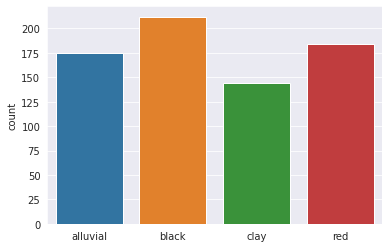

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("alluvial")
    elif (i[1] == 1):
        l.append("black")
    elif (i[1] == 2):
        l.append("clay")
    else:
        l.append("red")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
xtrain = []
ytrain = []
xval = []
yval = []

for feature, label in train:
    xtrain.append(feature)
    ytrain.append(label)

for feature, label in val:
    xval.append(feature)
    yval.append(label)

xtrain = np.array(xtrain) / 255
xval = np.array(xval) / 255

xtrain.reshape(-1, img_size, img_size, 1)
ytrain = np.array(ytrain)

xval.reshape(-1, img_size, img_size, 1)
yval = np.array(yval)

ytrain = keras.utils.to_categorical(ytrain, 4)
yval = keras.utils.to_categorical(yval, 4)


In [ ]:
print(len(xval))

188


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(xtrain)

In [ ]:
# model= Sequential()
# model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(224,224,3)))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

# model.add(Flatten())

# model.add(Dense(20,activation='relu'))
# model.add(Dense(15,activation='relu'))
# model.add(Dense(4,activation = 'softmax'))
    
# model.compile(
#               loss='categorical_crossentropy', 
#               metrics=['acc'],
#               optimizer='adam'
#              )
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('softmax'))

model.compile(keras.optimizers.Adam(lr=1e-5), 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 150528)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 150528)            602112    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 602116    
_________________________________________________________________
batch_normalization_8 (Batch (None, 4)                 16        
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
Total params: 1,204,244
Trainable params: 903,180
Non-trainable params: 301,064
_________________________________________________________________


In [ ]:
history = model.fit(xtrain,ytrain,epochs = 50, validation_data = (xval, yval))

Epoch 1/50
23/23 [==============================] - 3s 83ms/step - loss: 0.9893 - accuracy: 0.6117 - val_loss: 1.2584 - val_accuracy: 0.3936
Epoch 2/50
23/23 [==============================] - 2s 73ms/step - loss: 0.6503 - accuracy: 0.8269 - val_loss: 1.0459 - val_accuracy: 0.5266
Epoch 3/50
23/23 [==============================] - 2s 73ms/step - loss: 0.6065 - accuracy: 0.8489 - val_loss: 0.9862 - val_accuracy: 0.6809
Epoch 4/50
23/23 [==============================] - 2s 73ms/step - loss: 0.5858 - accuracy: 0.8796 - val_loss: 0.9690 - val_accuracy: 0.7394
Epoch 5/50
23/23 [==============================] - 2s 74ms/step - loss: 0.5382 - accuracy: 0.9065 - val_loss: 0.9689 - val_accuracy: 0.8138
Epoch 6/50
23/23 [==============================] - 2s 74ms/step - loss: 0.5150 - accuracy: 0.9313 - val_loss: 0.9484 - val_accuracy: 0.8298
Epoch 7/50
23/23 [==============================] - 2s 73ms/step - loss: 0.4827 - accuracy: 0.9370 - val_loss: 0.9275 - val_accuracy: 0.7766
Epoch 8/50
23

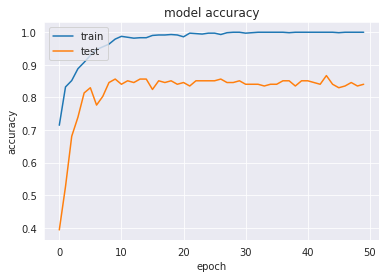

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

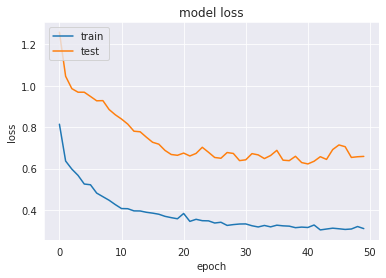

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(xval,yval)
print(evaluate)

188 188
6/6 [==============================] - 0s 18ms/step - loss: 0.6591 - accuracy: 0.8404
[0.6591143608093262, 0.8404255509376526]


In [ ]:
checkImage = xval[0:1]
checklabel = yval[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'alluvial',1:'black',2:'clay',3:'red'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[1. 0. 0. 0.]]
Predicted :-  alluvial


In [ ]:
model.save("soilClassify.h5")